In [5]:
import pymongo
import pandas as pd
import base64
from PIL import Image
import io
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [7]:
timelines = pd.read_csv('timelines.csv')

In [8]:
demographies = pd.read_csv('demographies.csv')

In [10]:
timelines = timelines.dropna()

In [11]:
emo = pd.read_csv('emotions.csv')
emo = emo.sort_values(by=['userId', 'timestamp'])
emo = emo.dropna()

In [12]:
emo.head()

,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,lipPress,...,disgust,contempt,anger,fear,surprise,valence,engagement,timestamp,userId,_id
219105,0.000023,0.286420,0.324985,0.000130,0.043827,0.000022,0.000339,0.388137,0.003109,0.002685,...,0.427603,0.192674,0.001948,0.004508,0.197079,0.0,0.083111,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775760)
219107,0.001308,0.005566,0.290480,0.000741,0.265971,0.027669,0.000128,0.035873,0.001603,0.001879,...,0.479791,0.192659,0.001952,0.004343,0.200429,0.0,0.117863,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775761)
219106,0.000184,0.011433,0.138774,0.001032,0.209178,0.041469,0.002174,0.028054,0.001491,0.001221,...,0.443336,0.192675,0.001963,0.004485,0.195367,0.0,0.085559,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775762)
219108,0.000069,0.004591,0.061073,0.009487,21.571196,0.042780,0.003898,0.233027,0.009496,0.000315,...,2.915958,0.192707,0.001984,0.004514,0.193769,0.0,0.373818,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775763)
219110,0.000199,0.006848,0.219500,0.030979,4.126130,0.044266,0.019357,6.855668,0.012115,0.000771,...,0.628714,0.192783,0.002459,0.004506,0.194787,0.0,0.172907,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775764)


In [9]:
emo.columns

Index(['smile', 'innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle',
       'upperLipRaise', 'lipCornerDepressor', 'chinRaise', 'lipPucker',
       'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure', 'attention',
       'lidTighten', 'jawDrop', 'dimpler', 'eyeWiden', 'cheekRaise',
       'lipStretch', 'joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear',
       'surprise', 'valence', 'engagement', 'timestamp', 'userId', '_id'],
      dtype='object')

In [17]:
movieParts = pd.read_csv('adsAndMovie_without_na.csv')

In [23]:
moviePartsWithAge = pd.read_csv('meanOfMovieWithAge.csv')

In [121]:
movieColumns=['1.0_M', '1.0_A', '2.0_M', '2.0_A', '3.0_M', '3.0_A', '4.0_M', '4.0_A', 'userId']

In [110]:
moviePartsWithAge.loc[moviePartsWithAge['userId'] == 'Sanuli_12_female']

,Unnamed: 0,Unnamed: 0.1,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,...,anger,fear,surprise,valence,engagement,timestamp,userId,num,part,age
381,384,mean,0.004478,0.079214,0.180139,0.000048,0.019494,0.000014,0.000417,0.025454,...,0.001961,0.004533,0.196332,0.000000,0.081275,116.850000,Sanuli_12_female,1.0,M,0
382,386,mean,13.734286,0.415568,17.645684,0.000025,0.004537,0.004453,0.007019,13.826852,...,0.016012,13.042611,8.926007,7.985348,22.887005,23.976889,Sanuli_12_female,2.0,M,0
383,387,mean,8.241858,0.823882,12.009674,0.000128,0.152310,0.020304,0.004561,8.315151,...,0.020905,17.406558,5.593456,6.987423,13.964845,95.617533,Sanuli_12_female,2.0,A,0
384,388,mean,13.850502,0.635482,8.981869,0.000129,0.209174,0.013873,0.003249,6.430514,...,0.017806,14.194206,3.959048,12.832455,19.135790,160.695545,Sanuli_12_female,3.0,M,0
385,389,mean,13.516180,0.862464,11.728724,0.000136,0.177068,7.918318,0.030543,5.536649,...,0.019624,11.725825,5.803370,8.919461,24.969143,229.309125,Sanuli_12_female,3.0,A,0
386,390,mean,13.946766,0.815472,11.343597,0.000145,0.166685,7.494038,0.029669,6.155555,...,0.018719,11.160208,5.493380,9.203861,24.156518,241.788088,Sanuli_12_female,4.0,M,0
387,391,mean,19.034046,0.873652,12.015184,0.000148,0.227015,6.036607,0.884949,10.122209,...,0.016171,9.891993,5.748975,12.669437,29.463930,292.534372,Sanuli_12_female,4.0,A,0


In [39]:
# finding the most liked and hated ad
moviePartsWithAge = pd.read_csv('meanOfMovieWithAge.csv')

In [40]:
moviePartsWithAge.loc[moviePartsWithAge['userId'] == 'Lahiru_23_male']

,Unnamed: 0,Unnamed: 0.1,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,...,anger,fear,surprise,valence,engagement,timestamp,userId,num,part,age
0,0,mean,0.944980,0.007321,12.931460,0.000247,0.001265,6.469341,2.508669,3.186199,...,0.037459,0.076230,4.207244,-5.051303,15.784402,36.196418,Lahiru_23_male,1.0,M,1
1,1,mean,0.000223,0.001590,12.212350,0.000247,0.003044,0.917955,4.922062,6.981729,...,0.390009,0.003132,4.062983,-7.817432,14.007696,82.014279,Lahiru_23_male,1.0,A,1
2,2,mean,0.585185,0.005256,12.794181,0.000236,0.001991,4.346483,3.189683,4.299268,...,0.152735,0.048412,4.056534,-5.722758,14.642886,49.798928,Lahiru_23_male,2.0,M,1
3,3,mean,0.250589,0.252834,10.394885,0.007487,0.077309,2.349885,9.574063,3.080715,...,0.088650,0.226062,3.796687,-7.349686,13.669061,115.964499,Lahiru_23_male,2.0,A,1
4,4,mean,0.224445,0.237248,11.080581,0.117665,0.073010,2.119239,12.559441,2.798391,...,0.094116,0.202612,4.322070,-9.253248,15.385725,129.701614,Lahiru_23_male,3.0,M,1
5,5,mean,2.009563,0.185200,11.330839,0.084009,0.055128,2.136273,14.387203,2.673038,...,0.076611,0.144169,3.665013,-8.220958,17.396636,184.123915,Lahiru_23_male,3.0,A,1
6,6,mean,6.595376,0.170446,10.475908,0.077316,0.051068,2.951739,13.332749,2.535868,...,0.071339,0.132743,3.669115,-2.989107,22.005073,200.334350,Lahiru_23_male,4.0,M,1
7,7,mean,5.527062,0.170824,9.908801,0.064805,0.043436,2.566737,16.759428,2.217050,...,0.062985,0.111668,3.218508,-5.853229,21.800915,240.565510,Lahiru_23_male,4.0,A,1


In [41]:
# creating favAd dataframe
moviePartsWithAge.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'smile', 'innerBrowRaise', 'browRaise',
       'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
       'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
       'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
       'eyeWiden', 'cheekRaise', 'lipStretch', 'joy', 'sadness', 'disgust',
       'contempt', 'anger', 'fear', 'surprise', 'valence', 'engagement',
       'timestamp', 'userId', 'num', 'part', 'age'],
      dtype='object')

In [27]:
usernames = set(list(movieParts['userId']))

In [46]:
favAd = pd.DataFrame(list(usernames), columns=['userId'])
favAd['ad'] = 0

In [47]:
for name in usernames:
    rows = moviePartsWithAge.loc[moviePartsWithAge['userId'] == name]
    print(rows[['joy', 'surprise', 'valence', 'engagement', 'attention', 'age', 'userId']])
    rows = moviePartsWithAge.loc[(moviePartsWithAge['userId'] == name) & (rows['part'] == 'A')]
#     rows = rows.loc[rows['part'] == 'A']
#     print(rows['attention'])
#     print(rows['joy'])
#     print(rows['engagement'])
    print(rows[['joy', 'surprise', 'valence', 'engagement', 'attention', 'age']])
    print(rows.loc[rows['attention'] == max(rows['attention'])][['joy', 'surprise', 'valence', 'engagement', 'attention', 'age', 'num']])
    rows = rows.loc[rows['attention'] == max(rows['attention'])][['joy', 'surprise', 'valence', 'engagement', 'attention', 'age', 'num']]
    print(rows['num'].values[0])
    favAd.loc[favAd['userId'] == name, 'ad'] = rows['num'].values[0]
#     break



          joy  surprise    valence  engagement  attention  age         userId
79  57.898541  5.419297  37.796977   75.915047  83.967435    1  chanduni_30_f
80   0.048597  1.152047  -9.512452   34.347502  85.760067    1  chanduni_30_f
81  47.373165  3.531339  32.779898   66.350954  85.758683    1  chanduni_30_f
82  38.448187  5.764590  26.001968   58.932730  80.115268    1  chanduni_30_f
83  38.809735  7.047599  26.716720   59.822689  80.834611    1  chanduni_30_f
84  38.753731  9.090467  26.135784   60.020507  78.479408    1  chanduni_30_f
85  39.272521  8.448967  26.719790   59.823053  79.371009    1  chanduni_30_f
86  37.414777  7.313356  26.344306   56.850474  80.079550    1  chanduni_30_f
          joy  surprise    valence  engagement  attention  age
80   0.048597  1.152047  -9.512452   34.347502  85.760067    1
82  38.448187  5.764590  26.001968   58.932730  80.115268    1
84  38.753731  9.090467  26.135784   60.020507  78.479408    1
86  37.414777  7.313356  26.344306   56.850474

3.0
         joy  surprise   valence  engagement  attention  age         userId
8   0.001811  2.903018 -6.577463   19.246221  97.281619    1  Kavindu__19_m
9   0.001778  0.523702 -2.471000    5.744845  97.495375    1  Kavindu__19_m
10  0.001801  1.937645 -4.785826   13.578124  97.413005    1  Kavindu__19_m
11  0.042119  1.620177 -6.955137   17.083415  94.550729    1  Kavindu__19_m
12  0.769669  3.027437 -5.351784   22.595755  93.253401    1  Kavindu__19_m
13  0.541891  2.311865 -4.290956   16.850744  94.271101    1  Kavindu__19_m
14  0.505879  2.272716 -4.024977   17.257615  93.760020    1  Kavindu__19_m
15  1.469578  2.640095 -2.960103   17.687075  93.881452    1  Kavindu__19_m
         joy  surprise   valence  engagement  attention  age
9   0.001778  0.523702 -2.471000    5.744845  97.495375    1
11  0.042119  1.620177 -6.955137   17.083415  94.550729    1
13  0.541891  2.311865 -4.290956   16.850744  94.271101    1
15  1.469578  2.640095 -2.960103   17.687075  93.881452    1
       

237  medhavi_25_female  
          joy  surprise   valence  engagement  attention  age
231  4.628630  3.097708 -0.873421   18.324603  95.723347    1
233  2.522699  3.115828 -2.474557   15.158559  96.364919    1
235  1.742505  2.385017 -2.469585   12.897938  96.723961    1
237  1.338333  2.263317 -2.026615   11.542956  96.745824    1
          joy  surprise   valence  engagement  attention  age  num
237  1.338333  2.263317 -2.026615   11.542956  96.745824    1  4.0
4.0
           joy  surprise    valence  engagement  attention  age       userId
539  10.936996  0.650868   9.078005   29.403311  92.975669    0  dewdun_15_m
540   0.003792  0.713496  -6.772786    5.770748  90.442147    0  dewdun_15_m
541   6.337126  0.618144   3.511998   18.800070  92.313423    0  dewdun_15_m
542  15.583208  0.779351  12.630408   22.079429  95.043265    0  dewdun_15_m
543  14.325071  0.712876  11.476419   20.283371  93.609010    0  dewdun_15_m
544  14.473825  0.754548  10.516886   20.190507  93.884342    0  

23   1.358225  1.094766 -1.018502   21.868951  86.193763    3  Anusha_56_f
          joy  surprise   valence  engagement  attention  age
17  10.229312  3.824004  8.994021   31.113417  79.704153    3
19   1.464634  1.204071 -1.839734   22.972426  89.188202    3
21   1.160150  0.948904 -1.198077   23.349739  87.770970    3
23   1.358225  1.094766 -1.018502   21.868951  86.193763    3
         joy  surprise   valence  engagement  attention  age  num
19  1.464634  1.204071 -1.839734   22.972426  89.188202    3  2.0
2.0
           joy   surprise    valence  engagement  attention  age  \
475  47.310764  38.436855  34.883354   83.281921  97.961414    1   
476  75.665384  30.393503  43.073372   96.017462  95.760223    1   
477  43.217579  29.428452  29.603454   68.353173  97.636076    1   
478  40.078379  22.296135  31.961351   62.023442  94.169650    1   
479  35.354725  22.554374  28.109644   59.487516  94.447372    1   
480  29.675587  17.336778  22.314983   50.484720  95.347226    1   
481

In [45]:
favAd['ad_with_joy'] = 0
favAd['ad_with_sadness'] = 0
favAd['ad_with_disgust'] = 0
favAd['ad_with_contempt'] = 0
favAd['ad_with_anger'] = 0
favAd['ad_with_fear'] = 0
favAd['ad_with_surprice'] = 0
favAd['ad_with_engagement'] = 0
favAd['ad_with_attention'] = 0


In [46]:
for emoName in ['attention', 'joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear', 'surprise', 'engagement']:
    for name in usernames:
        rows = moviePartsWithAge.loc[moviePartsWithAge['userId'] == name]
        print(rows[['joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear', 'surprise', 'valence', 'engagement', 'attention', 'age', 'userId', 'num', 'part']])
        rows = moviePartsWithAge.loc[(moviePartsWithAge['userId'] == name) & (rows['part'] == 'A')]
#         break;
#     break
    #     rows = rows.loc[rows['part'] == 'A']
    #     print(rows['attention'])
    #     print(rows['joy'])
    #     print(rows['engagement'])
#         print(rows[['joy', 'surprise', 'valence', 'engagement', 'attention', 'age']])
        print(rows.loc[rows[emoName] == max(rows[emoName])][['joy', 'surprise', 'valence', 'engagement', 'attention', 'age', 'num']])
#         break
#     break
        rows = rows.loc[rows[emoName] == max(rows[emoName])][['joy', 'surprise', 'valence', 'engagement', 'attention', 'age', 'num']]
        print(rows['num'].values[0])
        favAd.loc[favAd['userId'] == name, 'ad_with_' + emoName] = rows['num'].values[0]
#         break
#     break



          joy   sadness   disgust  contempt     anger      fear  surprise  \
563  5.347994  0.136042  0.376391  0.171294  0.001694  0.005111  0.513227   
564  4.127140  0.021961  0.445337  0.188671  0.003123  0.003972  0.231108   
565  2.791566  0.064476  0.416333  0.184820  0.002133  0.004399  0.355411   
566  1.636645  0.046066  0.428168  0.191669  0.002364  0.004312  0.427878   
567  2.381117  0.043852  0.426861  0.190170  0.002307  0.004197  0.437138   
568  1.840054  0.038384  0.424771  0.196316  0.002720  0.004184  0.385657   
569  1.827058  0.037441  0.423707  0.198153  0.002667  0.004127  0.394948   
570  1.549673  0.035114  0.435711  0.197258  0.002605  0.004104  0.391442   

      valence  engagement  attention  age      userId  num part  
563  6.368229    7.159645  93.834784    0  sadew_14_m  1.0    M  
564  2.511945   10.421635  96.958852    0  sadew_14_m  1.0    A  
565  2.852932    5.500887  95.490358    0  sadew_14_m  2.0    M  
566  1.382195    5.626302  94.963255    0 

374  6.21653   8.34988 -4.376527   32.105342  96.764102    1  1.0
1.0
          joy    sadness   disgust  contempt     anger      fear  surprise  \
342  0.001576   0.532699  0.522812  0.202662  0.004832  0.004752  1.019221   
343  0.001412  10.480064  0.495434  0.700432  0.010666  0.029855  2.799345   
344  0.001467   3.400153  0.491535  0.350748  0.005605  0.011970  1.592949   
345  1.046215   1.811306  0.638127  0.271289  0.007959  0.008708  1.063827   
346  0.995588   1.754967  0.649165  0.267582  0.017300  0.008578  1.123185   
347  0.690792   1.228045  0.638134  0.245462  0.015442  0.007419  0.958919   
348  0.638481   1.154267  0.649986  0.241282  0.014643  0.024412  1.041466   
349  0.575419   1.097590  0.650980  0.279739  0.071958  0.038896  0.965880   

       valence  engagement  attention  age             userId  num part  
342  -2.826730    3.229425  96.405538    0  Akarsha_12_Female  1.0    M  
343 -14.099039    5.441856  93.812008    0  Akarsha_12_Female  1.0    A  
344  

         joy  surprise  valence  engagement  attention  age  num
25  0.001654  0.182238      0.0    0.136865  97.480237    3  1.0
1.0
          joy   sadness   disgust  contempt     anger      fear   surprise  \
467  2.172501  0.011419  1.590965  8.130600  0.015359  0.002278  12.070300   
468  0.205112  0.102900  2.506737  1.632671  0.092017  0.002307   2.164805   
469  1.257929  0.041326  1.719387  5.005187  0.037593  0.002597   7.382891   
470  0.531945  0.029790  2.878956  2.638912  0.027695  0.007970  10.705890   
471  0.513300  0.049767  2.675781  2.396200  0.025299  0.007287  10.005649   
472  0.445274  0.043734  3.067730  2.465786  0.022114  0.031825   9.138576   
473  0.406416  0.041276  2.884667  2.266532  0.020514  0.029304   8.544246   
474  0.327889  0.033930  3.332842  1.858675  0.021684  0.026589   7.657120   

       valence  engagement  attention  age            userId  num part  
467  -3.000698   36.307860  94.453140    2  Herath_51_female  1.0    M  
468 -47.264813   

           joy   surprise    valence  engagement  attention  age  num
476  75.665384  30.393503  43.073372   96.017462  95.760223    1  1.0
1.0
           joy   sadness   disgust  contempt     anger      fear  surprise  \
135  43.648190  0.013055  1.747272  0.085981  0.362547  0.001701  0.633652   
136  23.315150  0.001123  0.162635  0.085066  0.083936  0.000817  0.619747   
137  34.919904  0.009051  2.429896  0.085624  0.243472  0.001434  0.595618   
138  33.047756  0.007030  3.514674  0.218331  0.161503  0.001709  1.995144   
139  35.689910  0.006349  3.121367  0.247771  0.180740  0.002125  1.947759   
140  42.791723  0.010975  2.698712  0.211234  0.142449  0.001887  1.960401   
141  42.791723  0.010975  2.698712  0.211234  0.142449  0.001887  1.960401   
142  42.791723  0.010975  2.698712  0.211234  0.142449  0.001887  1.960401   

       valence  engagement  attention  age         userId  num part  
135  37.329072   63.918764  95.536670    1  supun_23_male  1.0    M  
136  26.43985

In [103]:
# favAd['ad'].values

In [105]:
# favAd['ad_with_attention'].values-1

joy
sadness
disgust
contempt
anger
fear
surprise
engagement
attention


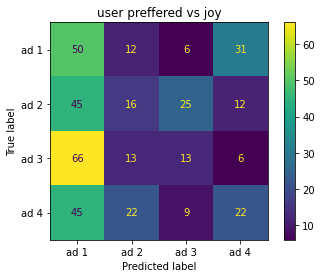

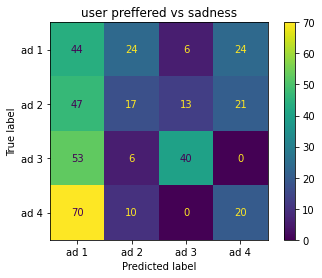

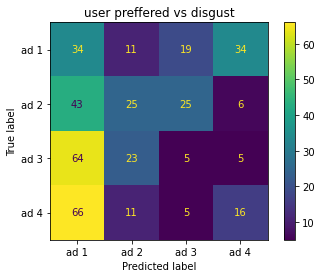

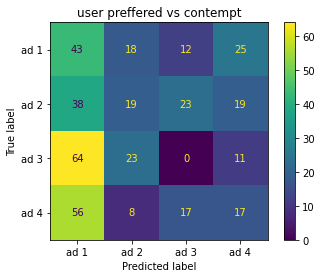

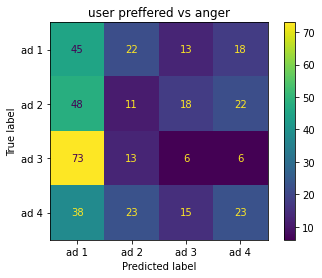

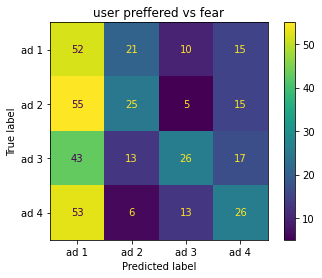

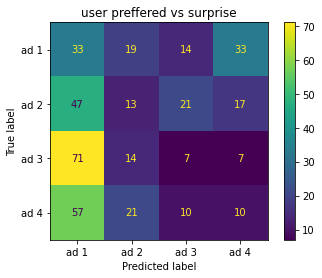

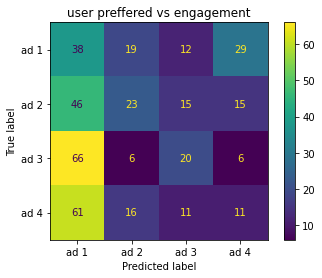

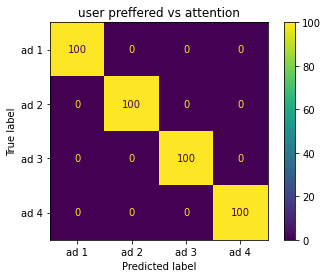

<Figure size 432x288 with 0 Axes>

In [110]:
# fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,10))
for emoName in ['joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear', 'surprise', 'engagement', 'attention']:
# for emoName in ['joy']:
    labels = ['ad 1', 'ad 2', 'ad 3', 'ad 4']
    cm = confusion_matrix(favAd['ad_with_' + emoName].values -1, favAd['ad'].values, [0,1,2,3])
    d = cm/cm.sum(axis=1)[:, np.newaxis] * 100
    cm = d.astype(int)
    ax= plt.subplot()
#     ax= axes.flatten()
#     axes.flatten()
    ax.set_xlabel('User Preffered');
    ax.set_ylabel('Predicted'); 
    ax.set_title('user preffered vs ' + emoName); 
    # ax.legend()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    print(emoName)
#     disp.ax_.set_title(emoName)
    plt.figure()
    disp.plot(ax=ax)
#     print('\n')
# plt.tight_layout()  

In [106]:
for facialEx in ['smile', 'innerBrowRaise', 'browRaise',
       'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
       'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
       'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
       'eyeWiden', 'cheekRaise', 'lipStretch']:
    favAd['ad_with_' + facialEx] = 0


In [107]:
for facialEx in ['smile', 'innerBrowRaise', 'browRaise',
       'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
       'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
       'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
       'eyeWiden', 'cheekRaise', 'lipStretch']:
    for name in usernames:
        rows = moviePartsWithAge.loc[moviePartsWithAge['userId'] == name]
#         print(rows[['joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear', 'surprise', 'valence', 'engagement', 'attention', 'age', 'userId', 'num', 'part']])
        rows = moviePartsWithAge.loc[(moviePartsWithAge['userId'] == name) & (rows['part'] == 'A')]
#         break;
#     break
    #     rows = rows.loc[rows['part'] == 'A']
    #     print(rows['attention'])
    #     print(rows['joy'])
    #     print(rows['engagement'])
#         print(rows[['joy', 'surprise', 'valence', 'engagement', 'attention', 'age']])
        print(rows.loc[rows[facialEx] == max(rows[facialEx])][['smile', 'innerBrowRaise', 'browRaise',
       'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
       'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
       'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
       'eyeWiden', 'cheekRaise', 'lipStretch', 'age', 'num']])
#         break
#     break
        rows = rows.loc[rows[facialEx] == max(rows[facialEx])][['joy', 'surprise', 'valence', 'engagement', 'attention', 'age', 'num']]
        print(rows['num'].values[0])
        favAd.loc[favAd['userId'] == name, 'ad_with_' + facialEx] = rows['num'].values[0]
#         break
#     break



        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
564  4.383953         0.01025   0.727176    0.030391     0.001576   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
564       0.005275            2.133833   3.899652  14.867278   4.68269  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
564    2.339284  96.958852    0.114651  0.526455  4.947992  0.000006   

     cheekRaise  lipStretch  age  num  
564    0.932514     0.05493    0  1.0  

[1 rows x 23 columns]
1.0
         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
277  12.859558        0.066944   1.124312    0.062764      0.71024   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
277      40.265636            7.719487   0.884885   5.925351  1.724906  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
277    1.077886  97.677213    0.706284  20.679444  1.705102  0.000233   

   

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
428  22.446872        8.239189  20.638237   13.480189     19.25526   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
428       8.717403            0.316023  21.589692  10.775646  12.406986  ...   

     eyeClosure  attention  lidTighten    jawDrop    dimpler   eyeWiden  \
428   14.540315  95.422469    0.707424  13.653635  23.514095  18.542359   

     cheekRaise  lipStretch  age  num  
428    0.012433     0.94685    1  1.0  

[1 rows x 23 columns]
1.0
         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
600  26.057992        8.928295    3.48398    1.364462     1.406459   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
600       4.019999            0.781785    1.85644  20.522076   3.47089  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
600    0.979051  88.193692    2.191458  5.795379  3.992509  2.760791

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
84  40.575992        0.403127   9.402349    1.554904      2.26788   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
84       1.634581            4.770418  15.582607   9.866368  11.377265  ...   

    eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
84    4.453638  78.479408    1.468119  18.100822  14.665115  2.636587   

    cheekRaise  lipStretch  age  num  
84   11.097308    13.65952    1  3.0  

[1 rows x 23 columns]
3.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
172  1.42223        0.004461   0.975495    0.132837    12.202798   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
172       1.443526             0.13095    2.26553   1.161281  0.997254  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
172    0.175001   88.50169    0.012035  0.970701  0.514666  0.003575   

     chee

       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
76  5.054494        0.859222   3.293668    0.047221     0.806996   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
76        1.43401            2.696233   0.882656   0.471769   5.68978  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
76    1.846242  93.382504    0.056326  7.226374  1.886299  4.658252   

    cheekRaise  lipStretch  age  num  
76   10.984889    1.104781    1  3.0  

[1 rows x 23 columns]
3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
566  1.945793        0.551308   3.698539    0.129558     0.003888   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
566       0.036932            1.052253   0.736471    9.10815  2.129129  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
566    2.388738  94.963255    0.113382  3.010995  3.298742  0.017795   

     cheekRaise

4.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
241  6.352011        0.016014   0.958016      3.7245     0.015963   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
241       0.037987             0.33997   2.439767   3.510236  1.920398  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
241    1.713956  76.957416    0.012854  1.405197  6.761661   0.23081   

     cheekRaise  lipStretch  age  num  
241    0.458572    1.182013    1  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
416  3.093985        0.459627   5.040579    0.140958     0.452335   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
416      14.119086            0.237342   5.427531  11.419325  0.711163  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler   eyeWiden  \
416     0.00215  91.865163    2.763326  1.658316  4.652265  24.832923   

 

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
281  17.489329       12.127411  19.962718    0.596311     4.921587   
283  17.489329       12.127411  19.962718    0.596311     4.921587   
285  17.489329       12.127411  19.962718    0.596311     4.921587   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
281      16.991329            8.693526   7.658284   3.711573  11.518503  ...   
283      16.991329            8.693526   7.658284   3.711573  11.518503  ...   
285      16.991329            8.693526   7.658284   3.711573  11.518503  ...   

     eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
281    0.064162  95.569251    0.451068  22.238283  22.904957  6.615826   
283    0.064162  95.569251    0.451068  22.238283  22.904957  6.615826   
285    0.064162  95.569251    0.451068  22.238283  22.904957  6.615826   

     cheekRaise  lipStretch  age  num  
281   12.152384    3.912512    1  2.0  
283   12.152384    3.

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
528  3.704606        0.017027   7.727084     2.22262      3.67299   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
528       0.022231            2.400835   2.423469   3.986783  8.034405  ...   

     eyeClosure  attention  lidTighten  jawDrop   dimpler  eyeWiden  \
528    1.982996  95.357224     1.39012   3.7131  9.855706  0.520236   

     cheekRaise  lipStretch  age  num  
528    11.15952    5.367632    3  3.0  

[1 rows x 23 columns]
3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
436  0.000141       39.596941  14.763799    4.411956     0.019305   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
436       0.003903            0.025747   5.515906   2.266113  1.832311  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
436    6.639658  97.004019    0.079333  2.543667  1.206352   0.01116   

     chee

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
339  0.087094        0.140998   0.253855    0.068501     0.009169   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
339        0.00012            0.004206   1.260796   2.246068  1.774366  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
339    1.109028   97.35706    0.013345  0.221528  1.613773  0.040527   

     cheekRaise  lipStretch  age  num  
339    2.622685    0.163509    1  3.0  

[1 rows x 23 columns]
3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
353  8.811185       12.925217  33.111823    0.064143     3.481315   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
353       0.967204            3.230311   5.663324   4.588635  5.543055  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
353    9.123155  88.293319    0.209535  3.544948  8.187249  2.711221   

     ch

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
397  7.020662        0.484603  28.983814    0.015596     0.716173   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
397       5.761412            0.034513   0.204466   3.870176  0.513546  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
397    3.769582  92.608929    0.026022  2.424705  0.038474  0.257399   

     cheekRaise  lipStretch  age  num  
397    0.403315    0.024741    1  1.0  

[1 rows x 23 columns]
1.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
132  6.081638        4.534759   6.138772   13.368698     0.625571   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
132       0.000276            2.061499   1.956039   2.589161  5.565601  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
132    0.095125  95.203039    10.40848  2.076236  2.268238  0.109957   

     ch

            smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
287  3.489380e-10        2.317431   0.048024    7.705054     0.023211   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
287       0.003066            0.062613   0.139812  14.206922  0.696784  ...   

     eyeClosure  attention  lidTighten   jawDrop  dimpler  eyeWiden  \
287    0.033564  91.353926    0.475441  7.591117  0.10288  2.475977   

     cheekRaise  lipStretch  age  num  
287     0.00711    0.008935    1  1.0  

[1 rows x 23 columns]
1.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
126  3.160982         0.03792   2.777053    0.000062      9.79365   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
126       0.339049            0.014102   0.014223   0.712984  0.070018  ...   

     eyeClosure  attention  lidTighten  jawDrop   dimpler  eyeWiden  \
126     0.11368   85.79968    0.010942  3.20784  0.068215  2.574155   

   

3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
454  3.424132        6.315293   1.251394    0.910594     0.006182   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
454       0.002875             0.05117   1.358218  17.444723  1.431818  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
454    9.990855  94.148902    0.433326  1.846635  0.677335  0.092933   

     cheekRaise  lipStretch  age  num  
454     3.73877    0.597394    1  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
574  1.596123        0.445114     33.445    0.060558     0.148187   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
574       23.97221            0.162203   0.147103   3.164488  2.273825  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
574      2.1559  96.962491    0.094932  18.194486  7.293887  2.441389   

 

1.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
217  23.53927         0.25821  26.543699    0.846024     1.030499   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
217       14.24479            0.844797  17.010643  10.319351  27.502498  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
217    2.329963   96.09167    0.079365  14.426974  8.533077  1.831069   

     cheekRaise  lipStretch  age  num  
217   25.270846    4.385245    0  2.0  

[1 rows x 23 columns]
2.0
      smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
39  3.50846        0.306566   1.547019    0.169199    14.012505   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
39      11.410823            4.206853   7.489055   4.932068  2.309202  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
39    2.582817  97.410459   22.485334  3.030659  6.149913  0.093772   

    che

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
100  0.006485       25.946508  35.081916    0.309878     0.321766   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
100       2.212467            9.309125  24.048021   6.137422  12.346965  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
100     2.15022   92.13853    0.312012  4.290978  20.55492  2.974333   

     cheekRaise  lipStretch  age  num  
100    3.464678    8.269365    1  3.0  

[1 rows x 23 columns]
3.0
      smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
59  0.91643        0.189111    5.35782    1.563247     0.369137   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
59       1.025003            0.223723   2.039238   5.424007  0.758667  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
59    6.421116  96.126164    0.085841  4.937965  0.880415  

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
578  3.374961        0.580687  33.627011    0.043829     0.792744   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
578      30.377931            1.095334   0.699201   3.868851  3.730572  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
578    1.761108  96.415143    0.127177  23.438524  7.721771  2.138423   

     cheekRaise  lipStretch  age  num  
578    5.672326    3.770917    0  4.0  

[1 rows x 23 columns]
4.0
         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
590  11.949403        0.263208   1.875432    3.384914     0.404213   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
590      29.748686           10.218629   0.455725   6.935441  5.382739  ...   

     eyeClosure  attention  lidTighten  jawDrop  dimpler  eyeWiden  \
590    4.107557  93.365296    1.142639  4.28117  7.33118  0.484647   

     ch

1.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
211  5.199953        0.020059  11.483869    0.228325     2.135433   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
211       8.760474             0.11301   5.605786   0.669104   6.77767  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
211    5.447774  96.593802    0.005628  9.963218  1.594601   0.01869   

     cheekRaise  lipStretch  age  num  
211   13.218555    0.130318    1  3.0  

[1 rows x 23 columns]
3.0
         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
399  19.054512        0.863477  22.493046    0.510337     1.117702   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
399       4.971456            0.865371   0.224488   7.147606  2.453975  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
399    3.007869  78.132762    0.036439  4.888436  0.811441  3.902845   

 

3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
530  3.102815        0.016488   7.711242    1.866585     3.420525   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
530       0.025201            2.519433   2.256646   4.391085   7.82041  ...   

     eyeClosure  attention  lidTighten   jawDrop    dimpler  eyeWiden  \
530    1.948243  95.749887     1.38921  4.948583  10.673349  0.444458   

     cheekRaise  lipStretch  age  num  
530   10.595685    4.930871    3  4.0  

[1 rows x 23 columns]
4.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
440  1.02306       24.180704   8.600992    4.606037     0.415962   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
440       0.068581            1.472458   5.078527   3.369479  4.373071  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
440    5.917278   92.97683     0.12056  6.675524  7.535966  0.218734   

   

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
608  1.684024        0.403183  20.939884    0.968003     0.085012   
610  1.684024        0.403183  20.939884    0.968003     0.085012   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
608       18.03025            0.825351   0.190704   0.750662  1.198206  ...   
610       18.03025            0.825351   0.190704   0.750662  1.198206  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
608    3.081539  97.853527    0.222057  16.613107  1.743168   0.16935   
610    3.081539  97.853527    0.222057  16.613107  1.743168   0.16935   

     cheekRaise  lipStretch  age  num  
608    6.341979    0.505624    1  3.0  
610    6.341979    0.505624    1  4.0  

[2 rows x 23 columns]
3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
152  12.18271        0.003408   1.622517    1.622543     1.048943   

     upperLipRaise  lipCornerDepressor  chinRais

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
385  13.51618        0.862464  11.728724    0.000136     0.177068   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
385       7.918318            0.030543   5.536649  11.821608  3.215792  ...   

     eyeClosure  attention  lidTighten   jawDrop  dimpler   eyeWiden  \
385    0.016428  87.329559    0.004486  7.891232  1.35772  57.194994   

     cheekRaise  lipStretch  age  num  
385    6.056037    5.803765    0  3.0  

[1 rows x 23 columns]
3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
82  40.364523        0.441613   7.343557    2.334526     1.348149   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
82       1.759754             6.75164  13.401076    8.18942  12.023807  ...   

    eyeClosure  attention  lidTighten  jawDrop    dimpler  eyeWiden  \
82    4.542653  80.115268    1.029069  13.6002  13.411259  3.257796   

    cheek

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
365  2.003661        0.460435  16.437476    1.793728     1.521542   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
365       0.324799            3.371409   1.329933   8.247879  1.563924  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
365     4.51738  95.099977    0.019396  1.863216  2.879308  0.032488   

     cheekRaise  lipStretch  age  num  
365    2.225482    1.056222    1  4.0  

[1 rows x 23 columns]
4.0
         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
114  17.881256        0.164397   6.413529    0.696292     3.779043   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
114       2.568192           17.747351   5.259897   4.513465  11.932974  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
114     2.25485  92.306009    0.398399  7.377084  3.974395  7.609789   

   

       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
43  0.020415        5.596512  13.684231    0.430542     2.427159   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
43       0.044886            2.819735   2.538845   3.701739  9.552109  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
43   17.814375  94.945043    0.063849  4.482008  9.069774  0.112661   

    cheekRaise  lipStretch  age  num  
43    0.160166    2.686223    1  2.0  

[1 rows x 23 columns]
2.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
492  0.18042        7.068004  13.027257    1.274648     0.020857   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
492       0.000036           23.455006   3.025113   7.438295  7.474598  ...   

     eyeClosure  attention  lidTighten   jawDrop    dimpler  eyeWiden  \
492   56.462643  97.229335    0.280387  4.917845  10.693105  5.112015   

     cheekRaise

       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
92  12.84412        1.551184   2.901073    1.169003     0.021873   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
92       0.738032           11.935624   0.635507  19.357788  2.748852  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
92    1.896394  97.749657    0.044117  18.79256  7.462763  3.497087   

    cheekRaise  lipStretch  age  num  
92    1.153155   11.721598    1  3.0  

[1 rows x 23 columns]
3.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
31  2.774901        0.091752   5.981437    4.097986     4.487192   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
31       0.749014             5.10317   0.177891   1.703493  2.458741  ...   

    eyeClosure  attention  lidTighten   jawDrop  dimpler  eyeWiden  \
31    1.529504  93.244423    0.913995  9.107496  2.06012  0.962214   

    cheekRaise  lipStre

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
221  26.756905        0.124905  15.706032    0.758963     0.584429   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
221       8.810733            7.728173  10.640497   5.909947  14.823182  ...   

     eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
221    2.866043  96.400212    0.102369  19.667857  10.424251  1.052636   

     cheekRaise  lipStretch  age  num  
221   22.619011    2.110054    0  4.0  

[1 rows x 23 columns]
4.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
33  1.194783        0.178668   2.548625    0.052012    10.955547   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
33       16.46046           28.901634   1.562481   1.098491  2.052898  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
33     0.05838  97.462213   55.255305  8.714748  5.410605  1.354999   

    c

      smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
59  0.91643        0.189111    5.35782    1.563247     0.369137   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
59       1.025003            0.223723   2.039238   5.424007  0.758667  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
59    6.421116  96.126164    0.085841  4.937965  0.880415  2.150023   

    cheekRaise  lipStretch  age  num  
59    0.889257    0.133734    1  2.0  

[1 rows x 23 columns]
2.0
      smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
11  0.06262        0.630165   5.914644     0.02334     0.295892   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
11       0.021831            1.195718   4.034026  10.374758  6.884874  ...   

    eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
11    1.854808  94.550729    0.110262  12.618796  14.678233  0.836509   

    cheekRaise  lipSt

4.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
594  6.965474        0.625783   2.100016    3.054559     0.331846   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
594      23.677694            7.209704   0.583009   8.409796  5.013705  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
594    4.111402  94.604734    1.107665  8.137781  5.288412  0.391011   

     cheekRaise  lipStretch  age  num  
594    6.475095    4.410792    1  4.0  

[1 rows x 23 columns]
4.0
         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
584  18.814819        0.012474   4.092267    0.026333     2.903024   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
584       5.508739            2.931246    0.37653   2.332855  6.014553  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
584    3.291073  83.780439     0.01877  13.29331  6.571388  0.897324   

 

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
207  1.221308        0.012528  11.137099    0.139723     0.639772   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
207       3.254998            0.131759  11.227102   0.153206  4.723307  ...   

     eyeClosure  attention  lidTighten   jawDrop  dimpler  eyeWiden  \
207    1.294767  97.640356    0.002403  3.959363  0.44126  0.010327   

     cheekRaise  lipStretch  age  num  
207   12.459169     0.02048    1  1.0  

[1 rows x 23 columns]
1.0
         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
401  11.643678        1.109686  15.988195    0.445589     0.689406   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
401       3.185962            1.995817   0.477681   7.321295  2.164008  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
401    3.125639  84.882084    0.067129  3.729627  0.899885  3.285443   

     ch

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
502  1.064607        2.632416   4.351024    6.982313     1.529425   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
502       0.002979           11.224279  10.747326  13.631122  14.963599  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
502    3.198594  96.714538    5.984297  18.450849  9.915481  3.314489   

     cheekRaise  lipStretch  age  num  
502    0.642813   11.410054    1  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
530  3.102815        0.016488   7.711242    1.866585     3.420525   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
530       0.025201            2.519433   2.256646   4.391085   7.82041  ...   

     eyeClosure  attention  lidTighten   jawDrop    dimpler  eyeWiden  \
530    1.948243  95.749887     1.38921  4.948583  10.673349  0.444458   

 

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
154  1.738381        0.004382    3.93938    0.357212     1.321641   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
154       1.020543            0.007177   3.493453    2.64504  0.449172  ...   

     eyeClosure  attention  lidTighten  jawDrop   dimpler  eyeWiden  \
154    0.285857  93.597416    0.008828   4.6153  1.445122  0.000296   

     cheekRaise  lipStretch  age  num  
154    0.395163    0.037653    2  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
339  0.087094        0.140998   0.253855    0.068501     0.009169   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
339        0.00012            0.004206   1.260796   2.246068  1.774366  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
339    1.109028   97.35706    0.013345  0.221528  1.613773  0.040527   

     chee

1.0
         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
546  20.554482        1.799225   0.769574    0.053272     3.590257   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
546       0.019334            3.364936   0.318125   4.414254   3.10695  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
546     4.55436  93.246459    0.840317  3.827562  5.057891  0.477336   

     cheekRaise  lipStretch  age  num  
546    6.552504     5.35782    0  4.0  

[1 rows x 23 columns]
4.0
         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
444  73.415381        0.000015   0.321827    0.000867    50.303806   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
444      98.597477            0.000605    1.31336   0.253741  0.114393  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
444     1.00306  81.909837    0.000593  39.587696  0.083376   0.00002  

1.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
273  7.417487        0.023183      1.082    0.050836     0.483155   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
273      42.843764            5.459263   1.186313   3.721159  2.266576  ...   

     eyeClosure  attention  lidTighten    jawDrop  dimpler  eyeWiden  \
273    1.893838  97.361311    0.703147  15.941905  2.28264  0.000413   

     cheekRaise  lipStretch  age  num  
273    6.375775     4.18476    1  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
502  1.064607        2.632416   4.351024    6.982313     1.529425   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
502       0.002979           11.224279  10.747326  13.631122  14.963599  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
502    3.198594  96.714538    5.984297  18.450849  9.915481  3.314489   


        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
606  2.381329        0.250033   23.39231    0.780094     0.115794   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
606      16.317272            0.777269   0.232855    0.34272  1.660915  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
606    4.192733  97.889656    0.237297  19.04606  2.142677  0.169611   

     cheekRaise  lipStretch  age  num  
606    7.132623    0.713455    1  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
152  12.18271        0.003408   1.622517    1.622543     1.048943   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
152        1.38182            0.007097   0.500584   0.696342  0.754155  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
152    0.474104   89.37226    0.014112  27.242069  0.650602  0.001071   

     

[1 rows x 23 columns]
4.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
267  5.89742        0.010595   6.565691    3.124467     0.021174   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
267       1.584307            4.461757   1.378706   0.876045  4.885313  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
267    0.486466  91.445523    0.586898  12.098506  8.496799  0.003123   

     cheekRaise  lipStretch  age  num  
267    1.950552    7.405429    1  3.0  

[1 rows x 23 columns]
3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
178  7.236001        0.016524   0.791733    0.588762     1.817031   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
178       1.395398            0.158582   1.911729   0.677517  0.659749  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
178    0.239826  93.219618    0.044466  0.667512  0.91

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
405  0.037311         0.11597   9.458422    0.003666     0.005143   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
405       0.000028            2.043091   7.619409   0.180183  2.283221  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
405    0.187331  95.508476    0.011176  0.387547  4.440575  1.030328   

     cheekRaise  lipStretch  age  num  
405    0.003745     1.46137    1  1.0  

[1 rows x 23 columns]
1.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
247  0.040355        1.839426   0.246266   19.195379     0.013577   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
247       0.000046            0.176562   0.405341  27.783012  4.233271  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
247    0.764646  95.744914    0.040299  7.942059  0.900094  0.183528   

     ch

       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
492  0.18042        7.068004  13.027257    1.274648     0.020857   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
492       0.000036           23.455006   3.025113   7.438295  7.474598  ...   

     eyeClosure  attention  lidTighten   jawDrop    dimpler  eyeWiden  \
492   56.462643  97.229335    0.280387  4.917845  10.693105  5.112015   

     cheekRaise  lipStretch  age  num  
492    1.970007    0.868282    0  1.0  

[1 rows x 23 columns]
1.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
51  4.843448         0.37253   4.530678    0.279276     2.547281   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
51       0.138684            6.542208   0.444155   1.521882   6.11033  ...   

    eyeClosure  attention  lidTighten   jawDrop    dimpler  eyeWiden  \
51   23.583488  94.850299    0.624265  4.104893  15.625999  0.020522   

    cheekRa

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
468  2.722151        0.042854   2.178036    1.270836      1.60211   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
468       3.807436           56.392311  19.527326  11.291499  6.077001  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
468    2.033068  90.676087     0.00558  39.033197  8.806628  0.069805   

     cheekRaise  lipStretch  age  num  
468    0.240509   11.459427    2  1.0  

[1 rows x 23 columns]
1.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
426  9.027993       10.748012  12.472883     0.68844     1.152501   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
426       2.936825            0.780753   5.945319   9.810041  7.015592  ...   

     eyeClosure  attention  lidTighten   jawDrop    dimpler   eyeWiden  \
426    0.167833  90.235513     1.05386  8.082216  12.431585  29.801403   

 

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
462  1.171795        1.938246  17.885415    0.174344     1.188619   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
462       4.180236           16.305206   5.510361  19.055427  7.243902  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
462    2.759117  94.699646    0.064508  28.081835  6.348317  0.783807   

     cheekRaise  lipStretch  age  num  
462    5.099386    2.455643    0  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
233  3.498329        0.114284   3.886558    0.010889     0.071073   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
233      12.157785            0.610154   0.510393   1.966008  5.045921  ...   

     eyeClosure  attention  lidTighten    jawDrop  dimpler   eyeWiden  \
233    1.270534  96.364919    0.099161  14.489696  2.33178  22.617685   

   

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
514  41.578451        0.245682   8.530649    0.417902      7.88918   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
514      16.392778           12.130347  19.326062  16.335381  9.733837  ...   

     eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
514    3.481337  89.709172     0.39584  27.464329  26.326633  0.717955   

     cheekRaise  lipStretch  age  num  
514   19.506337    2.908036    2  4.0  

[1 rows x 23 columns]
4.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
65  0.006715        2.683735   0.631682    4.424113     0.037651   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
65       0.052144            0.996722   3.578611   1.198526  0.234277  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
65    0.154491  21.425927    0.010711  2.383092  0.074151  0.207918   

    che

       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
31  2.774901        0.091752   5.981437    4.097986     4.487192   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
31       0.749014             5.10317   0.177891   1.703493  2.458741  ...   

    eyeClosure  attention  lidTighten   jawDrop  dimpler  eyeWiden  \
31    1.529504  93.244423    0.913995  9.107496  2.06012  0.962214   

    cheekRaise  lipStretch  age  num  
31    1.765537    0.706106    3  4.0  

[1 rows x 23 columns]
4.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
470  1.257491        2.074206  19.018621    0.184281     1.242076   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
470       4.485938           10.184577   5.755567  19.997102  7.739789  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
470    2.579128  94.619212    0.067761  29.423939  6.776207   0.84048   

     cheekRaise

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
333  0.000004       17.684196  24.153884    0.121191      0.07279   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
333      19.492983            3.548711   2.408599   5.737884  1.813863  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
333    0.771057  95.207855    0.351905  27.33352  0.523317  0.075078   

     cheekRaise  lipStretch  age  num  
333     2.76495    0.243753    1  4.0  

[1 rows x 23 columns]
4.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
460  1.31842       11.111042  45.769413    1.340769     2.026947   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
460       4.192251           36.757803   1.075041  17.499504  26.652115  ...   

     eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
460     5.08636  94.270978    0.231356  30.491891  12.583404  1.446919   

   

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
514  41.578451        0.245682   8.530649    0.417902      7.88918   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
514      16.392778           12.130347  19.326062  16.335381  9.733837  ...   

     eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
514    3.481337  89.709172     0.39584  27.464329  26.326633  0.717955   

     cheekRaise  lipStretch  age  num  
514   19.506337    2.908036    2  4.0  

[1 rows x 23 columns]
4.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
67  0.221569        1.594399   0.208598    0.485177     0.972511   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
67       1.037433            0.309124   3.134317   2.842831   6.28906  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
67    0.189796  31.222478    0.010964  0.735211  2.808384  0.026201   

    che

       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
94  9.852133        1.391719   2.595811    0.900327     0.020464   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
94       0.566053            9.161693   0.527639   15.08568  2.794344  ...   

    eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
94    1.783123  97.838052    0.034198  14.695792  7.176371  2.860188   

    cheekRaise  lipStretch  age  num  
94    1.056141   10.024902    1  4.0  

[1 rows x 23 columns]
4.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
31  2.774901        0.091752   5.981437    4.097986     4.487192   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
31       0.749014             5.10317   0.177891   1.703493  2.458741  ...   

    eyeClosure  attention  lidTighten   jawDrop  dimpler  eyeWiden  \
31    1.529504  93.244423    0.913995  9.107496  2.06012  0.962214   

    cheekRaise  lipSt

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
518  8.708532        1.224611   5.741717   13.740363    16.128891   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
518      18.530761            2.428064   0.954352   9.047218  0.390561  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
518    5.649076  73.143769    4.892935  14.95887  2.432784  0.232351   

     cheekRaise  lipStretch  age  num  
518   10.404405    0.454313    2  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
329  0.000005       15.379938  23.011702    0.111614     0.002953   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
329      14.388984             4.22818   2.200098   8.179246  2.941736  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
329    0.132326   95.70059    0.195503  19.632448  0.524537  0.145383   

     

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
160  12.162892        0.003113   1.581824    1.698096     1.241425   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
160       1.339368            0.006859   0.352883   1.210883  0.755484  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
160    0.561513  89.853986      0.0149  27.151679  0.603517   0.00107   

     cheekRaise  lipStretch  age  num  
160    2.331378    0.013982    2  1.0  

[1 rows x 23 columns]
1.0
         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
514  41.578451        0.245682   8.530649    0.417902      7.88918   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
514      16.392778           12.130347  19.326062  16.335381  9.733837  ...   

     eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
514    3.481337  89.709172     0.39584  27.464329  26.326633  0.717955  

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
184  0.003253        0.047501   2.379388    0.133071     0.080494   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
184       0.002278            1.036232   4.116295   4.423414  0.982209  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
184    1.144477  88.857866    0.044068  0.068227  8.407663  0.000902   

     cheekRaise  lipStretch  age  num  
184     0.00748    0.023387    2  1.0  

[1 rows x 23 columns]
1.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
92  12.84412        1.551184   2.901073    1.169003     0.021873   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
92       0.738032           11.935624   0.635507  19.357788  2.748852  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
92    1.896394  97.749657    0.044117  18.79256  7.462763  3.497087   

    cheekRais

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
221  26.756905        0.124905  15.706032    0.758963     0.584429   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
221       8.810733            7.728173  10.640497   5.909947  14.823182  ...   

     eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
221    2.866043  96.400212    0.102369  19.667857  10.424251  1.052636   

     cheekRaise  lipStretch  age  num  
221   22.619011    2.110054    0  4.0  

[1 rows x 23 columns]
4.0
      smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
39  3.50846        0.306566   1.547019    0.169199    14.012505   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
39      11.410823            4.206853   7.489055   4.932068  2.309202  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
39    2.582817  97.410459   22.485334  3.030659  6.149913  0.093772   

    che

       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
96  0.000038       23.693756  21.798476    7.475205     0.015461   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
96       0.033752             13.6861   25.16722   0.382442  2.505971  ...   

    eyeClosure  attention  lidTighten  jawDrop    dimpler  eyeWiden  \
96    0.000033  93.319051    0.037968  2.76016  15.583637  0.098561   

    cheekRaise  lipStretch  age  num  
96    9.059775    9.435057    1  1.0  

[1 rows x 23 columns]
1.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
63  0.613651        0.151115   3.464099    0.764636     0.176833   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
63       0.476098            0.288315   1.167337   2.747045  0.523884  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
63    3.948237  97.318125    0.057076  2.596783  0.655497  1.006812   

    cheekRaise  lipSt

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
594  6.965474        0.625783   2.100016    3.054559     0.331846   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
594      23.677694            7.209704   0.583009   8.409796  5.013705  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
594    4.111402  94.604734    1.107665  8.137781  5.288412  0.391011   

     cheekRaise  lipStretch  age  num  
594    6.475095    4.410792    1  4.0  

[1 rows x 23 columns]
4.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
580  6.054933        0.003363   0.102498    0.004167     2.412547   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
580       0.835761             0.03402   0.295797   1.380536  2.579069  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
580    0.323227  94.256928    0.005551  22.982231  2.534552  0.185856   

     

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
476  77.720651         0.37558  41.024316     0.23992    20.692792   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
476      32.656412            6.174609   8.242612  21.514388  15.733765  ...   

     eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
476    2.208553  95.760223    4.502482  21.471371  12.679641  2.748883   

     cheekRaise  lipStretch  age  num  
476    24.93543    9.086796    1  1.0  

[1 rows x 23 columns]
1.0
         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
140  48.753934        0.440007   5.734016    0.511003      8.04939   
142  48.753934        0.440007   5.734016    0.511003      8.04939   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
140      13.179189            1.465916  12.248575  41.072375  18.413238  ...   
142      13.179189            1.465916  12.248575  41.072375  18.413238

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
120  7.574604        0.036727   2.704963    0.000051    10.663061   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
120       0.070464            0.009879   0.002811   0.004153  0.037749  ...   

     eyeClosure  attention  lidTighten   jawDrop  dimpler  eyeWiden  \
120    0.002885  91.520442    0.013395  3.595598  0.01641  3.386436   

     cheekRaise  lipStretch  age  num  
120    0.036573    0.009751    3  1.0  

[1 rows x 23 columns]
1.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
560  2.597091        3.905203  16.996433    0.145499     2.209855   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
560       1.122751            6.150097   1.775323   4.339104  2.949406  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
560    4.956449  91.922348     1.07006  9.365243  6.916988  0.352652   

     chee

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
454  3.424132        6.315293   1.251394    0.910594     0.006182   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
454       0.002875             0.05117   1.358218  17.444723  1.431818  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
454    9.990855  94.148902    0.433326  1.846635  0.677335  0.092933   

     cheekRaise  lipStretch  age  num  
454     3.73877    0.597394    1  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
578  3.374961        0.580687  33.627011    0.043829     0.792744   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
578      30.377931            1.095334   0.699201   3.868851  3.730572  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
578    1.761108  96.415143    0.127177  23.438524  7.721771  2.138423   

     

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
401  11.643678        1.109686  15.988195    0.445589     0.689406   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
401       3.185962            1.995817   0.477681   7.321295  2.164008  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
401    3.125639  84.882084    0.067129  3.729627  0.899885  3.285443   

     cheekRaise  lipStretch  age  num  
401    1.968254    2.771438    1  3.0  

[1 rows x 23 columns]
3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
128  0.073586        5.308238   6.102517   33.164592     0.026931   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
128   5.538801e-07            0.022223   0.402987    0.57355  0.097814  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
128    0.000538  88.477412    20.26866  0.214822  0.078215  0.000039   

     

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
550  43.771664        0.890794    7.23144    2.773369     2.580934   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
550       0.008613            0.952952   2.877047   0.534475  3.028079  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
550    5.791892  94.856673    0.593395  3.994146  6.724531  0.162499   

     cheekRaise  lipStretch  age  num  
550    7.771097    2.843176    2  2.0  

[1 rows x 23 columns]
2.0
            smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
287  3.489380e-10        2.317431   0.048024    7.705054     0.023211   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
287       0.003066            0.062613   0.139812  14.206922  0.696784  ...   

     eyeClosure  attention  lidTighten   jawDrop  dimpler  eyeWiden  \
287    0.033564  91.353926    0.475441  7.591117  0.10288  2.475977   


        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
299  9.238777       15.283949  18.212276    8.436587     0.304197   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
299       0.079793            1.430023   3.897152   1.074591  3.927065  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
299    0.071031  95.669512    0.236263  4.097304  4.394364  1.331462   

     cheekRaise  lipStretch  age  num  
299     9.44136     0.60638    2  3.0  

[1 rows x 23 columns]
3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
456  6.024423        4.271159   1.885737    0.709955     0.055309   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
456       0.001861            2.419503   2.281276  23.541934  1.419721  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
456   14.599197  94.661621    0.318426  2.156916  1.315382  0.086098   

     ch

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
281  17.489329       12.127411  19.962718    0.596311     4.921587   
283  17.489329       12.127411  19.962718    0.596311     4.921587   
285  17.489329       12.127411  19.962718    0.596311     4.921587   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
281      16.991329            8.693526   7.658284   3.711573  11.518503  ...   
283      16.991329            8.693526   7.658284   3.711573  11.518503  ...   
285      16.991329            8.693526   7.658284   3.711573  11.518503  ...   

     eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
281    0.064162  95.569251    0.451068  22.238283  22.904957  6.615826   
283    0.064162  95.569251    0.451068  22.238283  22.904957  6.615826   
285    0.064162  95.569251    0.451068  22.238283  22.904957  6.615826   

     cheekRaise  lipStretch  age  num  
281   12.152384    3.912512    1  2.0  
283   12.152384    3.

2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
530  3.102815        0.016488   7.711242    1.866585     3.420525   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
530       0.025201            2.519433   2.256646   4.391085   7.82041  ...   

     eyeClosure  attention  lidTighten   jawDrop    dimpler  eyeWiden  \
530    1.948243  95.749887     1.38921  4.948583  10.673349  0.444458   

     cheekRaise  lipStretch  age  num  
530   10.595685    4.930871    3  4.0  

[1 rows x 23 columns]
4.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
442  2.875758       23.283694  12.977339    4.960276     0.345856   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
442       0.055131            2.272926   4.469398   3.876087  4.828859  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
442    5.921431  93.716853    0.103356  6.794737  9.222837  0.180296   

 

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
154  1.738381        0.004382    3.93938    0.357212     1.321641   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
154       1.020543            0.007177   3.493453    2.64504  0.449172  ...   

     eyeClosure  attention  lidTighten  jawDrop   dimpler  eyeWiden  \
154    0.285857  93.597416    0.008828   4.6153  1.445122  0.000296   

     cheekRaise  lipStretch  age  num  
154    0.395163    0.037653    2  2.0  

[1 rows x 23 columns]
2.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
337  0.12889        0.165141   0.198463    0.078635     0.013609   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
337       0.000038            0.001067   1.172792   1.450242  2.294482  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
337    1.202167   96.91714    0.015873  0.152631  2.028863  0.056911   

     cheekR

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
84  40.575992        0.403127   9.402349    1.554904      2.26788   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
84       1.634581            4.770418  15.582607   9.866368  11.377265  ...   

    eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
84    4.453638  78.479408    1.468119  18.100822  14.665115  2.636587   

    cheekRaise  lipStretch  age  num  
84   11.097308    13.65952    1  3.0  

[1 rows x 23 columns]
3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
174  1.283298        0.003992   0.962022    0.128873    13.735708   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
174       1.461919            0.103544   2.567723    1.02739  1.479114  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
174    0.134865   89.16598    0.012936  0.953034  0.661486  0.003186   

     ch

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
114  17.881256        0.164397   6.413529    0.696292     3.779043   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
114       2.568192           17.747351   5.259897   4.513465  11.932974  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
114     2.25485  92.306009    0.398399  7.377084  3.974395  7.609789   

     cheekRaise  lipStretch  age  num  
114    5.146731    2.440608    3  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
405  0.037311         0.11597   9.458422    0.003666     0.005143   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
405       0.000028            2.043091   7.619409   0.180183  2.283221  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
405    0.187331  95.508476    0.011176  0.387547  4.440575  1.030328   

   

       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
53  4.023755        0.703273   3.131206    1.977681     2.212382   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
53       0.168202             5.28607   0.339077    1.09661  4.999867  ...   

    eyeClosure  attention  lidTighten   jawDrop    dimpler  eyeWiden  \
53   22.554858   95.25702    0.873971  2.983937  11.887918  0.026022   

    cheekRaise  lipStretch  age  num  
53    6.060714    1.697069    1  3.0  

[1 rows x 23 columns]
3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
205  13.42607        0.891014   2.771388    9.858715     6.883688   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
205       3.066808            1.337984   6.145767   1.674562  2.817719  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
205   14.972657  94.721511    0.463665  3.763024  4.298946  0.847692   

     cheekRai

       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
31  2.774901        0.091752   5.981437    4.097986     4.487192   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
31       0.749014             5.10317   0.177891   1.703493  2.458741  ...   

    eyeClosure  attention  lidTighten   jawDrop  dimpler  eyeWiden  \
31    1.529504  93.244423    0.913995  9.107496  2.06012  0.962214   

    cheekRaise  lipStretch  age  num  
31    1.765537    0.706106    3  4.0  

[1 rows x 23 columns]
4.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
472  1.043619        1.525097  18.771506    0.257959     1.668228   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
472       4.124594           13.232551   5.326382  16.835535  5.996287  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
472    3.256155  94.802741    0.129313  24.300544  6.205632   2.15915   

     cheekRaise

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
329  0.000005       15.379938  23.011702    0.111614     0.002953   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
329      14.388984             4.22818   2.200098   8.179246  2.941736  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
329    0.132326   95.70059    0.195503  19.632448  0.524537  0.145383   

     cheekRaise  lipStretch  age  num  
329    4.052125    0.067233    1  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
464  0.993342        1.460971  18.383559    0.253455     1.595433   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
464       4.072536           12.597186   5.122473  16.069615  5.885219  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
464    3.440697  94.871639    0.123585  24.151119  6.203426   2.12756   

   

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
514  41.578451        0.245682   8.530649    0.417902      7.88918   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
514      16.392778           12.130347  19.326062  16.335381  9.733837  ...   

     eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
514    3.481337  89.709172     0.39584  27.464329  26.326633  0.717955   

     cheekRaise  lipStretch  age  num  
514   19.506337    2.908036    2  4.0  

[1 rows x 23 columns]
4.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
65  0.006715        2.683735   0.631682    4.424113     0.037651   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
65       0.052144            0.996722   3.578611   1.198526  0.234277  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
65    0.154491  21.425927    0.010711  2.383092  0.074151  0.207918   

    che

       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
92  12.84412        1.551184   2.901073    1.169003     0.021873   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
92       0.738032           11.935624   0.635507  19.357788  2.748852  ...   

    eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
92    1.896394  97.749657    0.044117  18.79256  7.462763  3.497087   

    cheekRaise  lipStretch  age  num  
92    1.153155   11.721598    1  3.0  

[1 rows x 23 columns]
3.0
       smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
31  2.774901        0.091752   5.981437    4.097986     4.487192   

    upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
31       0.749014             5.10317   0.177891   1.703493  2.458741  ...   

    eyeClosure  attention  lidTighten   jawDrop  dimpler  eyeWiden  \
31    1.529504  93.244423    0.913995  9.107496  2.06012  0.962214   

    cheekRaise  lipStre

        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
518  8.708532        1.224611   5.741717   13.740363    16.128891   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
518      18.530761            2.428064   0.954352   9.047218  0.390561  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
518    5.649076  73.143769    4.892935  14.95887  2.432784  0.232351   

     cheekRaise  lipStretch  age  num  
518   10.404405    0.454313    2  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
329  0.000005       15.379938  23.011702    0.111614     0.002953   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
329      14.388984             4.22818   2.200098   8.179246  2.941736  ...   

     eyeClosure  attention  lidTighten    jawDrop   dimpler  eyeWiden  \
329    0.132326   95.70059    0.195503  19.632448  0.524537  0.145383   

     

2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
162  1.731291        0.004378   3.947742    0.357683     1.346788   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
162       1.020285            0.007162   3.482907   2.634465  0.447752  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
162    0.284855     93.576    0.008813  4.597203  1.439681  0.000295   

     cheekRaise  lipStretch  age  num  
162    0.393704    0.037522    2  2.0  

[1 rows x 23 columns]
2.0
         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
512  40.897936         0.13839   6.235519    0.075071     3.619633   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
512      11.548446           11.940267  21.789911  15.802391  9.363453  ...   

     eyeClosure  attention  lidTighten    jawDrop    dimpler  eyeWiden  \
512    3.115686   91.30544    0.343445  24.045889  26.697004  0.658311  

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
584  18.814819        0.012474   4.092267    0.026333     2.903024   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
584       5.508739            2.931246    0.37653   2.332855  6.014553  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
584    3.291073  83.780439     0.01877  13.29331  6.571388  0.897324   

     cheekRaise  lipStretch  age  num  
584    4.593187    7.209265    1  3.0  

[1 rows x 23 columns]
3.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
193  0.172284         0.08216   5.084362    0.894794    36.105663   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
193       5.804492            0.050069   1.428638   1.248194  0.166322  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
193    0.454491   90.53921    0.039255  6.378088  1.261733  0.717813   

     

         smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
138  41.516994         0.31117   6.891857     0.66764     9.253687   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker   lipPress  ...  \
138      11.144405            2.075496  12.909476  42.118444  22.207505  ...   

     eyeClosure  attention  lidTighten   jawDrop    dimpler  eyeWiden  \
138    1.945847  95.796203    0.215382  5.813832  18.285489    0.7369   

     cheekRaise  lipStretch  age  num  
138    16.58484    1.026203    1  2.0  

[1 rows x 23 columns]
2.0
        smile  innerBrowRaise  browRaise  browFurrow  noseWrinkle  \
257  0.027575        4.525282   1.550316    1.427823     0.131767   

     upperLipRaise  lipCornerDepressor  chinRaise  lipPucker  lipPress  ...  \
257       0.001648            0.092985   0.261469   6.961304  0.522736  ...   

     eyeClosure  attention  lidTighten   jawDrop   dimpler  eyeWiden  \
257    0.762985  96.878519    0.019432  1.091594  0.543089  0.338593   

 

smile
innerBrowRaise
browRaise
browFurrow
noseWrinkle
upperLipRaise
lipCornerDepressor
chinRaise
lipPucker
lipPress
lipSuck
mouthOpen
smirk
eyeClosure
attention
lidTighten
jawDrop
dimpler
eyeWiden
cheekRaise
lipStretch


<ipython-input-112-8b918b159967>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


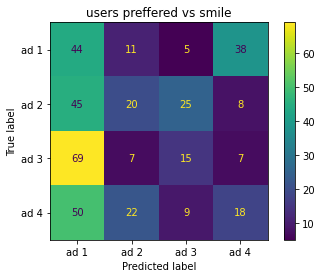

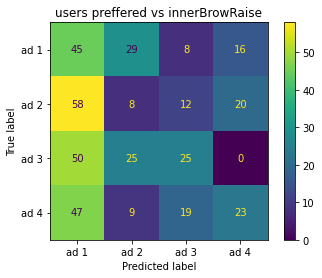

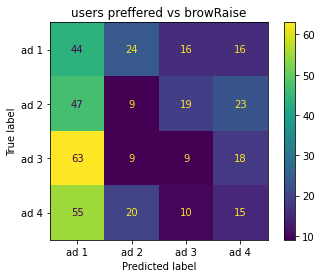

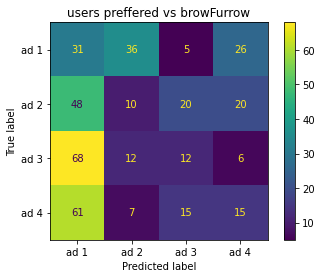

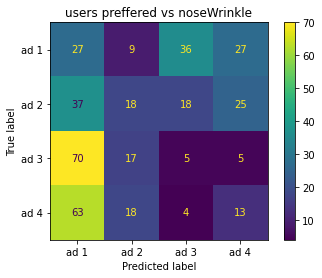

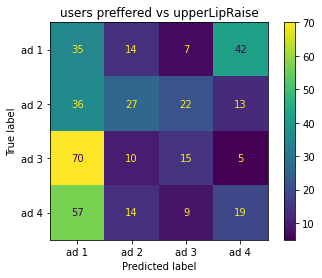

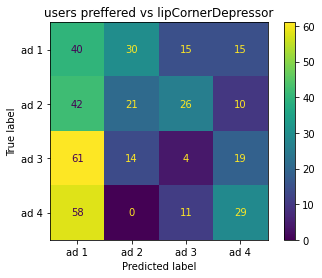

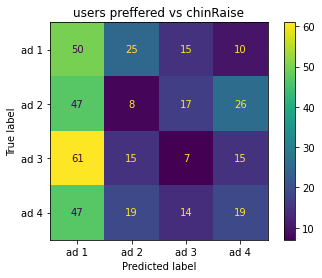

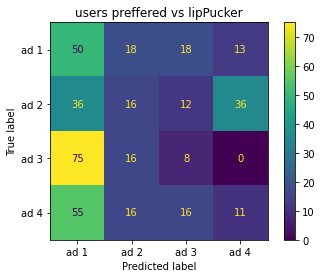

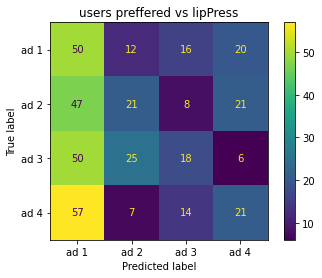

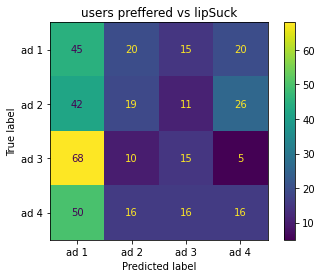

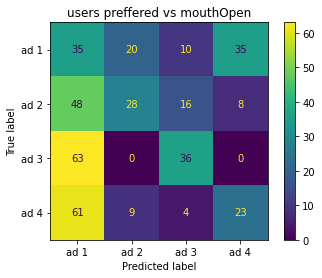

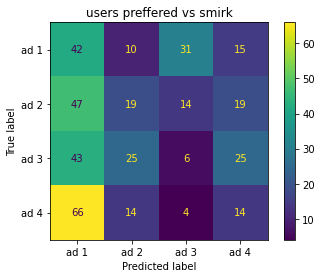

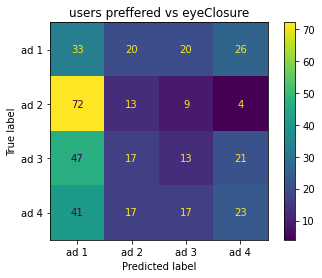

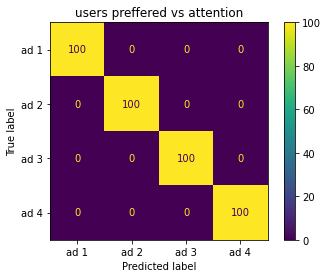

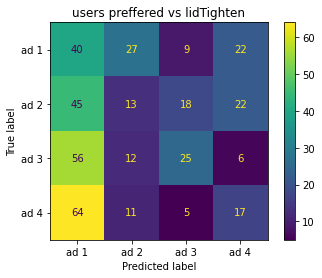

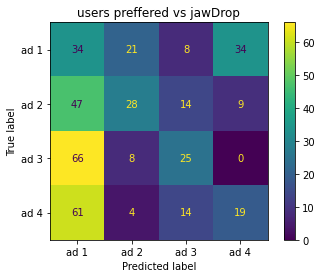

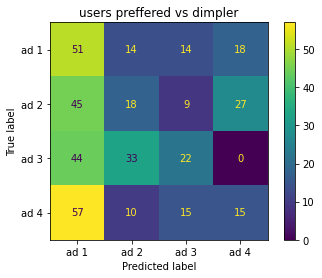

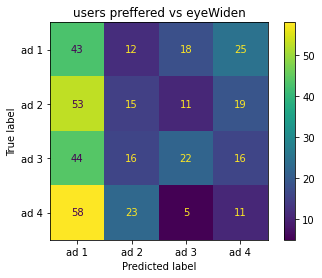

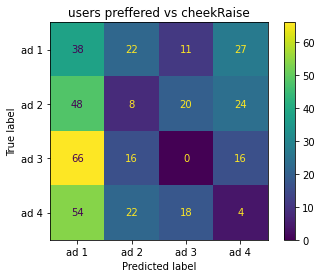

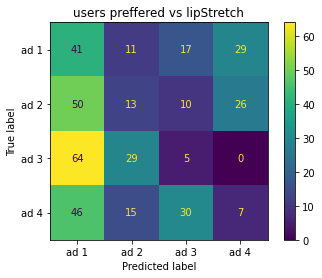

<Figure size 432x288 with 0 Axes>

In [112]:
# fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,10))
for facialEx in ['smile', 'innerBrowRaise', 'browRaise',
       'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
       'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
       'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
       'eyeWiden', 'cheekRaise', 'lipStretch']:
# for emoName in ['joy']:
    labels = ['ad 1', 'ad 2', 'ad 3', 'ad 4']
    cm = confusion_matrix(favAd['ad_with_' + facialEx].values -1, favAd['ad'].values, [0,1,2,3])
    d = cm/cm.sum(axis=1)[:, np.newaxis] * 100
    cm = d.astype(int)
    ax= plt.subplot()
#     ax= axes.flatten()
#     axes.flatten()
    ax.set_xlabel('User preffered');
    ax.set_ylabel('predicted'); 
    ax.set_title('users preffered vs ' + facialEx); 
    # ax.legend()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    print(facialEx)
#     disp.ax_.set_title(emoName)
    plt.figure()
    disp.plot(ax=ax)
#     print('\n')

In [119]:
def plotEmoForWholeDS(i, isParallel, emotion):
    age3 = moviePartsWithAge.loc[moviePartsWithAge['age'] > -1]
    userIds = set(list(age3['userId']))
    allData = []
    for user in userIds:
        data = moviePartsWithAge.loc[moviePartsWithAge['userId'] == user]
#         print(len(data))
        if len(data) > 7:
            joy = []
            movie = []
#             print(len(data))
        #     fig, ax = plt.subplots()
            for i, row in data.iterrows():
                joy.append(row[emotion])
                movie.append(str(row['num']) + '_' + row['part'])
        #         plt.plot(movie, joy)
            dictionary = {
                movie[0]: joy[0],
                movie[1]: joy[1],
                movie[2]: joy[2],
                movie[3]: joy[3],
                movie[4]: joy[4],
                movie[5]: joy[5],
                movie[6]: joy[6],
                movie[7]: joy[7],
                'userId': user
            }
        #     print(dictionary)
            allData.append(dictionary)
#         movie.append('userId')
#     print(allData)
#     break
    parallel = pd.DataFrame(allData, columns=movieColumns)
#     print(parallel)
#     break
    if isParallel :
        plt.figure(figsize=(10, 6), dpi=80)
        parallel_coordinates(parallel, "userId");
    else:
#         parallel.mean().plot(kind='line')
        return allData

<AxesSubplot:>

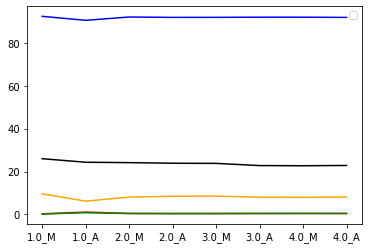

In [136]:
a0 = plotEmoForWholeDS(0, False, 'attention')
a1 = plotEmoForWholeDS(0, False, 'joy')
a2 = plotEmoForWholeDS(0, False, 'sadness')
a3 = plotEmoForWholeDS(0, False, 'anger')
a4 = plotEmoForWholeDS(0, False, 'engagement')
# a1 = plotEmo(1, False, 'attention')
# a2 = plotEmo(2, False, 'attention')
# a3 = plotEmo(3, False, 'attention')

p0 = pd.DataFrame(a0, columns=movieColumns)
p1 = pd.DataFrame(a1, columns=movieColumns)
p2 = pd.DataFrame(a2, columns=movieColumns)
p3 = pd.DataFrame(a3, columns=movieColumns)
p4 = pd.DataFrame(a4, columns=movieColumns)

fig = plt.figure()
plt.legend(['blue => attention', 'orange => joy', 'red => sadness', 'green => anger', 'black => engagement']);
# plt.show()
p0.mean().plot(kind='line', color='blue')
p1.mean().plot(kind='line', color='orange')
p2.mean().plot(kind='line', color='red')
p3.mean().plot(kind='line', color='green')
p4.mean().plot(kind='line', color='black')



<AxesSubplot:xlabel='Movie / Ad part', ylabel='Engagement value'>

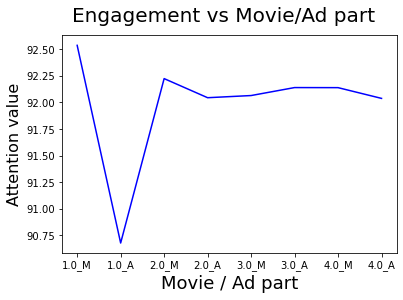

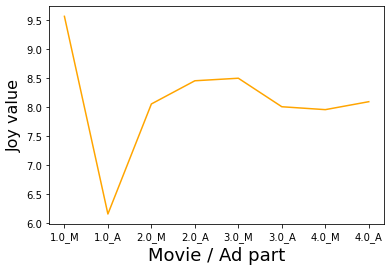

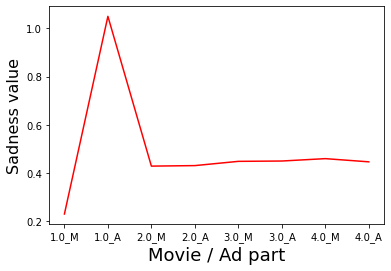

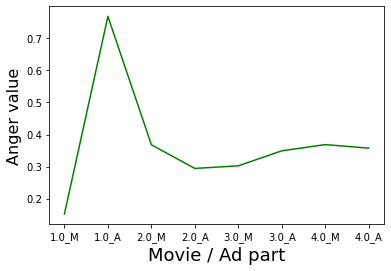

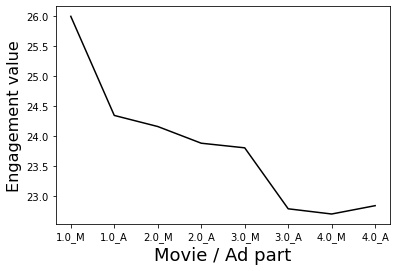

In [131]:
fig = plt.figure()
# plt.axes(('value', 'joy', 50, 50), facecolor='w')
fig.suptitle('Attention vs Movie/Ad part', fontsize=20)
plt.xlabel('Movie / Ad part', fontsize=18)
plt.ylabel('Attention value', fontsize=16)
p0.mean().plot(kind='line', color='blue')

plt.figure()
fig.suptitle('Joy vs Movie/Ad part', fontsize=20)
plt.xlabel('Movie / Ad part', fontsize=18)
plt.ylabel('Joy value', fontsize=16)
p1.mean().plot(kind='line', color='orange')

plt.figure()
fig.suptitle('Sadness vs Movie/Ad part', fontsize=20)
plt.xlabel('Movie / Ad part', fontsize=18)
plt.ylabel('Sadness value', fontsize=16)
p2.mean().plot(kind='line', color='red')

plt.figure()
fig.suptitle('Anger vs Movie/Ad part', fontsize=20)
plt.xlabel('Movie / Ad part', fontsize=18)
plt.ylabel('Anger value', fontsize=16)
p3.mean().plot(kind='line', color='green')

plt.figure()
fig.suptitle('Engagement vs Movie/Ad part', fontsize=20)
plt.xlabel('Movie / Ad part', fontsize=18)
plt.ylabel('Engagement value', fontsize=16)
p4.mean().plot(kind='line', color='black')

In [ ]:
['smile', 'innerBrowRaise', 'browRaise',
       'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
       'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
       'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
       'eyeWiden', 'cheekRaise', 'lipStretch', 'age', 'num']

In [138]:
a0 = plotEmoForWholeDS(0, False, 'smile')
a1 = plotEmoForWholeDS(0, False, 'browRaise')
a2 = plotEmoForWholeDS(0, False, 'noseWrinkle')
a3 = plotEmoForWholeDS(0, False, 'upperLipRaise')
a4 = plotEmoForWholeDS(0, False, 'lipCornerDepressor')
a5 = plotEmoForWholeDS(0, False, 'chinRaise')
a6 = plotEmoForWholeDS(0, False, 'lipPucker')
a7 = plotEmoForWholeDS(0, False, 'lipPress')
a8 = plotEmoForWholeDS(0, False, 'eyeClosure')
a9 = plotEmoForWholeDS(0, False, 'dimpler')
# a1 = plotEmo(1, False, 'attention')
# a2 = plotEmo(2, False, 'attention')
# a3 = plotEmo(3, False, 'attention')

p0 = pd.DataFrame(a0, columns=movieColumns)
p1 = pd.DataFrame(a1, columns=movieColumns)
p2 = pd.DataFrame(a2, columns=movieColumns)
p3 = pd.DataFrame(a3, columns=movieColumns)
p4 = pd.DataFrame(a4, columns=movieColumns)
p5 = pd.DataFrame(a5, columns=movieColumns)
p6 = pd.DataFrame(a6, columns=movieColumns)
p7 = pd.DataFrame(a7, columns=movieColumns)
p8 = pd.DataFrame(a8, columns=movieColumns)
p9 = pd.DataFrame(a9, columns=movieColumns)





<AxesSubplot:>

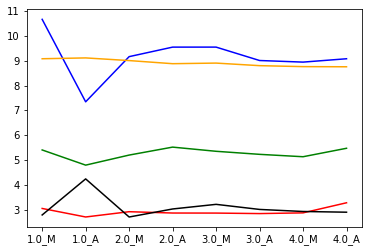

In [139]:
p0.mean().plot(kind='line', color='blue')
p1.mean().plot(kind='line', color='orange')
p2.mean().plot(kind='line', color='red')
p3.mean().plot(kind='line', color='green')
p4.mean().plot(kind='line', color='black')


<AxesSubplot:>

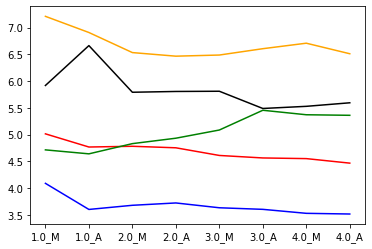

In [140]:
p5.mean().plot(kind='line', color='blue')
p6.mean().plot(kind='line', color='orange')
p7.mean().plot(kind='line', color='red')
p8.mean().plot(kind='line', color='green')
p9.mean().plot(kind='line', color='black')

In [42]:
# favAd = pd.read_csv('favAd.csv')
favAd = pd.read_csv('favAd_with_all_emotions.csv')

In [43]:
# favAd = favAd.drop(['Unnamed: 0'], axis=1)
favAd.head()

,userId,ad,age,gender,ad_with_joy,ad_with_sadness,ad_with_disgust,ad_with_contempt,ad_with_anger,ad_with_fear,ad_with_surprice,ad_with_engagement,ad_with_surprise
0,vihan_22_male,0.0,1,1,1.0,1.0,4.0,3.0,3.0,2.0,0,1.0,2.0
1,Rashmika_23_male,0.0,1,1,3.0,3.0,3.0,4.0,3.0,1.0,0,1.0,1.0
2,dylon_20_male,0.0,1,1,2.0,1.0,2.0,4.0,3.0,2.0,0,1.0,2.0
3,geethanjali_41_female,1.0,2,0,2.0,1.0,2.0,1.0,2.0,1.0,0,2.0,2.0
4,Sajith_28_male,0.0,1,1,3.0,2.0,4.0,3.0,2.0,3.0,0,3.0,3.0


In [48]:
# building classifiers and ml dl models
from sklearn.ensemble import RandomForestClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, SpatialDropout3D,LeakyReLU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import 
import plotly.express as px

In [54]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [91]:
favAd = pd.read_csv('favAd.csv')

In [92]:
x = favAd.drop(['userId', 'ad'], axis=1)
x = np.asarray(x.values, dtype=int)
y = np.asarray(favAd['ad'].values, dtype=int)

In [93]:
favAd.head()

,userId,ad,age,gender
0,vihan_22_male,0.0,1,1
1,Rashmika_23_male,0.0,1,1
2,dylon_20_male,0.0,1,1
3,geethanjali_41_female,1.0,2,0
4,Sajith_28_male,0.0,1,1


In [32]:
df = favAd.drop(['userId'], axis=1)

In [35]:
df = df.reindex(['gender', 'age', 'ad'], axis=1)

In [94]:
moviePartsWithAge['ad'] = -1

In [95]:
for i, row in moviePartsWithAge.iterrows():
    
    userId = row['userId']
#     print(userId)
    ad = int(favAd.loc[favAd['userId'] == userId]['ad'].values[0])
    moviePartsWithAge.loc[moviePartsWithAge['userId'] == userId, 'ad'] = ad
    
#     break

In [117]:
emoMoviePartsAgeAd = moviePartsWithAge[['smile', 'innerBrowRaise', 'browRaise', 'browFurrow',
       'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor', 'chinRaise',
       'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure','lidTighten', 'jawDrop', 'dimpler', 'eyeWiden',
       'cheekRaise', 'lipStretch', 'ad']]
x = emoMoviePartsAgeAd.drop(['ad'], axis=1)
x = np.asarray(x.values, dtype=int)
y = np.asarray(emoMoviePartsAgeAd['ad'].values, dtype=int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=50)
print(x_train.shape)
print(x_test.shape)


(495, 20)
(124, 20)


In [101]:

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))


[[65  0  0  0]
 [23  0  0  0]
 [12  0  6  0]
 [18  0  0  0]]
Accuracy0.5725806451612904
              precision    recall  f1-score   support

     class 0       0.55      1.00      0.71        65
     class 1       0.00      0.00      0.00        23
     class 2       1.00      0.33      0.50        18
     class 3       0.00      0.00      0.00        18

    accuracy                           0.57       124
   macro avg       0.39      0.33      0.30       124
weighted avg       0.43      0.57      0.44       124



/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
clf = svm.SVC()
clf.fit(x_train, y_train)
svmPredict = clf.predict(x_test)
cm = confusion_matrix(y_test, svmPredict)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, svmPredict)))
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

[[64  0  0  1]
 [ 5 18  0  0]
 [ 5  0 13  0]
 [ 8  0  0 10]]
Accuracy0.8467741935483871
              precision    recall  f1-score   support

     class 0       0.55      1.00      0.71        65
     class 1       0.00      0.00      0.00        23
     class 2       1.00      0.33      0.50        18
     class 3       0.00      0.00      0.00        18

    accuracy                           0.57       124
   macro avg       0.39      0.33      0.30       124
weighted avg       0.43      0.57      0.44       124



/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
emoMoviePartsAgeAd = moviePartsWithAge[['smile', 'innerBrowRaise', 'browRaise', 'browFurrow',
       'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor', 'chinRaise',
       'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure','lidTighten', 'jawDrop', 'dimpler', 'eyeWiden',
       'cheekRaise', 'lipStretch', 'ad']]
x = emoMoviePartsAgeAd.drop(['ad'], axis=1)
x = np.asarray(x.values, dtype=int)
y = np.asarray(emoMoviePartsAgeAd['ad'].values, dtype=int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=50)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=50)

y_test = to_categorical(y_test).astype(np.int32)
y_train = to_categorical(y_train).astype(np.int32)
y_val = to_categorical(y_val).astype(np.int32)

In [137]:
def create_model():
    model = Sequential()
    model.add(Dense(100, input_dim=20))
    model.add(LeakyReLU())
    model.add(Dense(50))
    model.add(LeakyReLU())
    model.add(Dense(25))
    model.add(LeakyReLU())
    model.add(Dense(10))
    model.add(LeakyReLU())
    model.add(Dense(4, activation='softmax'))
    # Compile model
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [138]:
model = create_model()
visualizer = tf.keras.callbacks.TensorBoard(log_dir='./timestamps_facial_features/')
earlystops = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True, verbose=1)


# Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_val, y_val),
            callbacks=[visualizer, earlystops])

Epoch 1/500
10/10 [==============================] - 0s 22ms/step - loss: 1.5593 - accuracy: 0.2161 - val_loss: 1.4785 - val_accuracy: 0.2097
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 1.2908 - accuracy: 0.2363 - val_loss: 1.2295 - val_accuracy: 0.2097
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 1.1148 - accuracy: 0.2735 - val_loss: 1.0309 - val_accuracy: 0.2581
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 1.0509 - accuracy: 0.2220 - val_loss: 0.8815 - val_accuracy: 0.2419
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 0.8490 - accuracy: 0.3073 - val_loss: 0.7817 - val_accuracy: 0.3065
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.8332 - accuracy: 0.2913 - val_loss: 0.7155 - val_accuracy: 0.3226
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 0.7383 - accuracy: 0.3252 - val_loss: 0.6727 - val_accuracy: 0.3468
Epoch 8/500


Epoch 59/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4004 - accuracy: 0.6610 - val_loss: 0.3977 - val_accuracy: 0.6774
Epoch 60/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3915 - accuracy: 0.6774 - val_loss: 0.3963 - val_accuracy: 0.6855
Epoch 61/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3730 - accuracy: 0.6933 - val_loss: 0.3945 - val_accuracy: 0.6855
Epoch 62/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3920 - accuracy: 0.6565 - val_loss: 0.3929 - val_accuracy: 0.6855
Epoch 63/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4008 - accuracy: 0.6738 - val_loss: 0.3907 - val_accuracy: 0.6855
Epoch 64/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3942 - accuracy: 0.6749 - val_loss: 0.3895 - val_accuracy: 0.6855
Epoch 65/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3897 - accuracy: 0.6802 - val_loss: 0.3881 - val_accuracy: 0.6855
Epoch 

10/10 [==============================] - 0s 6ms/step - loss: 0.1962 - accuracy: 0.9068 - val_loss: 0.2581 - val_accuracy: 0.8387
Epoch 174/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2088 - accuracy: 0.9017 - val_loss: 0.2583 - val_accuracy: 0.8468
Epoch 175/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2073 - accuracy: 0.8929 - val_loss: 0.2581 - val_accuracy: 0.8468
Epoch 176/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2016 - accuracy: 0.8902 - val_loss: 0.2561 - val_accuracy: 0.8306
Epoch 177/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1971 - accuracy: 0.9112 - val_loss: 0.2564 - val_accuracy: 0.8306
Epoch 178/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1979 - accuracy: 0.9085 - val_loss: 0.2565 - val_accuracy: 0.8387
Epoch 179/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1999 - accuracy: 0.8960 - val_loss: 0.2549 - val_accuracy: 0.8387
Epoch 180/500

10/10 [==============================] - 0s 6ms/step - loss: 0.0881 - accuracy: 0.9735 - val_loss: 0.2304 - val_accuracy: 0.8548
Epoch 288/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0921 - accuracy: 0.9756 - val_loss: 0.2381 - val_accuracy: 0.8629
Epoch 289/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0910 - accuracy: 0.9714 - val_loss: 0.2319 - val_accuracy: 0.8548
Epoch 290/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0932 - accuracy: 0.9728 - val_loss: 0.2317 - val_accuracy: 0.8629
Epoch 291/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1031 - accuracy: 0.9684 - val_loss: 0.2337 - val_accuracy: 0.8629
Epoch 292/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0860 - accuracy: 0.9824 - val_loss: 0.2352 - val_accuracy: 0.8629
Epoch 293/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0835 - accuracy: 0.9768 - val_loss: 0.2354 - val_accuracy: 0.8629
Epoch 294/500

In [139]:
# y_test.argmax(1)
predict = model.predict(x_test)
y_pred = np.argmax(predict, axis=1)
y_test_maxed = np.argmax(y_test, axis=1)
print(classification_report(y_test_maxed, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))


              precision    recall  f1-score   support

     class 0       0.92      0.90      0.91        96
     class 1       0.81      0.83      0.82        30
     class 2       0.79      0.90      0.84        29
     class 3       0.83      0.77      0.80        31

    accuracy                           0.87       186
   macro avg       0.84      0.85      0.84       186
weighted avg       0.87      0.87      0.87       186



In [128]:
model = tf.keras.models.load_model('models/facial_features.h5')

In [141]:

auc = 100*roc_auc_score(y_test, predict, average='weighted')
acc = 100*accuracy_score(np.argmax(y_test, axis=1), np.argmax(predict, axis=1))
prec, rec, f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(predict, axis=1), average='weighted')
print('Test accuracy: {:.5f}, AUC {:.5f}, Precision {:.5f}, Recall {:.5f}, F1 {:.5f}, \n'.format( acc, auc, prec, rec, f1))


Test accuracy: 86.55914, AUC 94.99042, Precision 0.86813, Recall 0.86559, F1 0.86601, 



/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


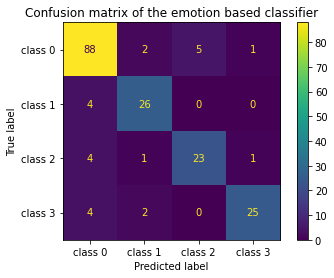

In [109]:


labels = ['class 0', 'class 1', 'class 2', 'class 3']
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predict, axis=1), [0,1,2,3])
ax= plt.subplot()
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix of the emotion based classifier'); 
# ax.legend()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(ax=ax)


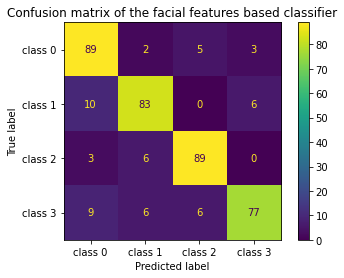

In [143]:
model = tf.keras.models.load_model('models/facial_features.h5')


labels = ['class 0', 'class 1', 'class 2', 'class 3']
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predict, axis=1), [0,1,2,3])
d = cm/cm.sum(axis=1)[:, np.newaxis] * 100
cm = d.astype(int)
ax= plt.subplot()
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix of the facial features based classifier'); 
# ax.legend()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(ax=ax)

In [112]:
# %tensorboard --logdir ./timestamps_facial_features/ --host localhost

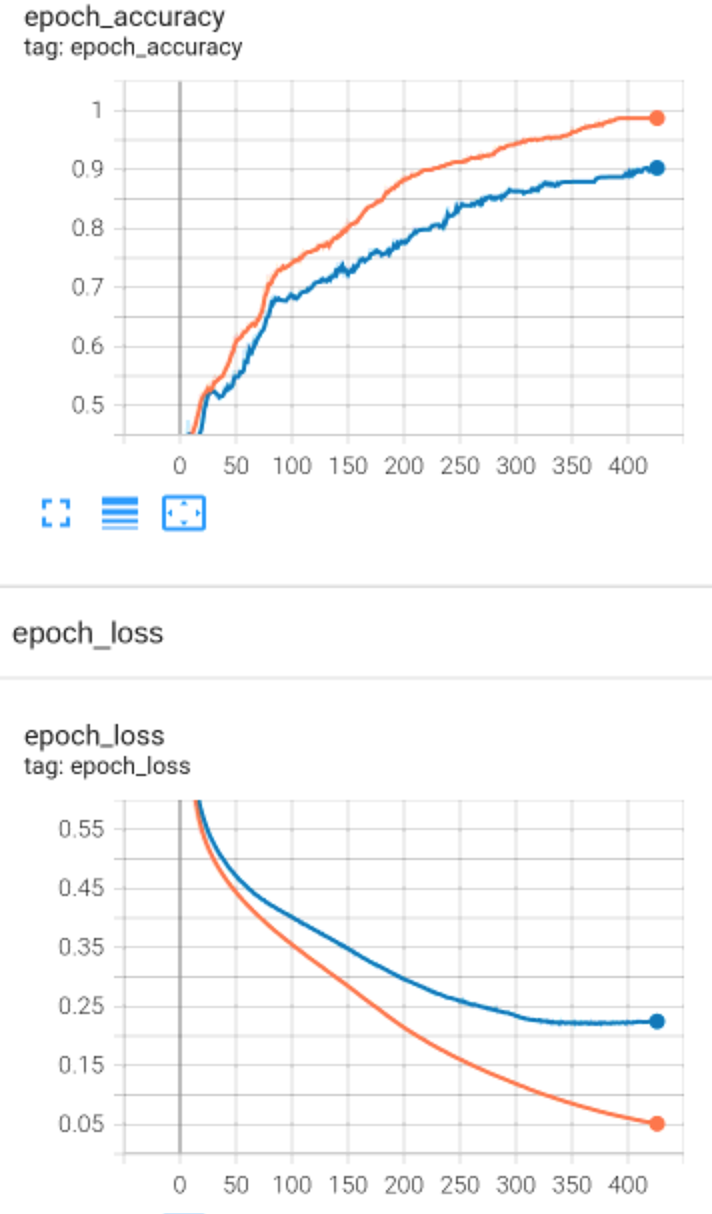

In [113]:
Image(filename='trainingLogs/facial_features.png')


In [140]:
model.save('models/facial_features.h5')
